# Named Entity Recognition with spaCy

Using Hugging Face Transformers to do Named Entity Recognition

Kabui, Charles  
2025-05-03

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/named-entity-recognition/index.html) -- [Download as Notebook](https://toknow.ai/posts/named-entity-recognition/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/named-entity-recognition/index.pdf)
 *** 

<figure>
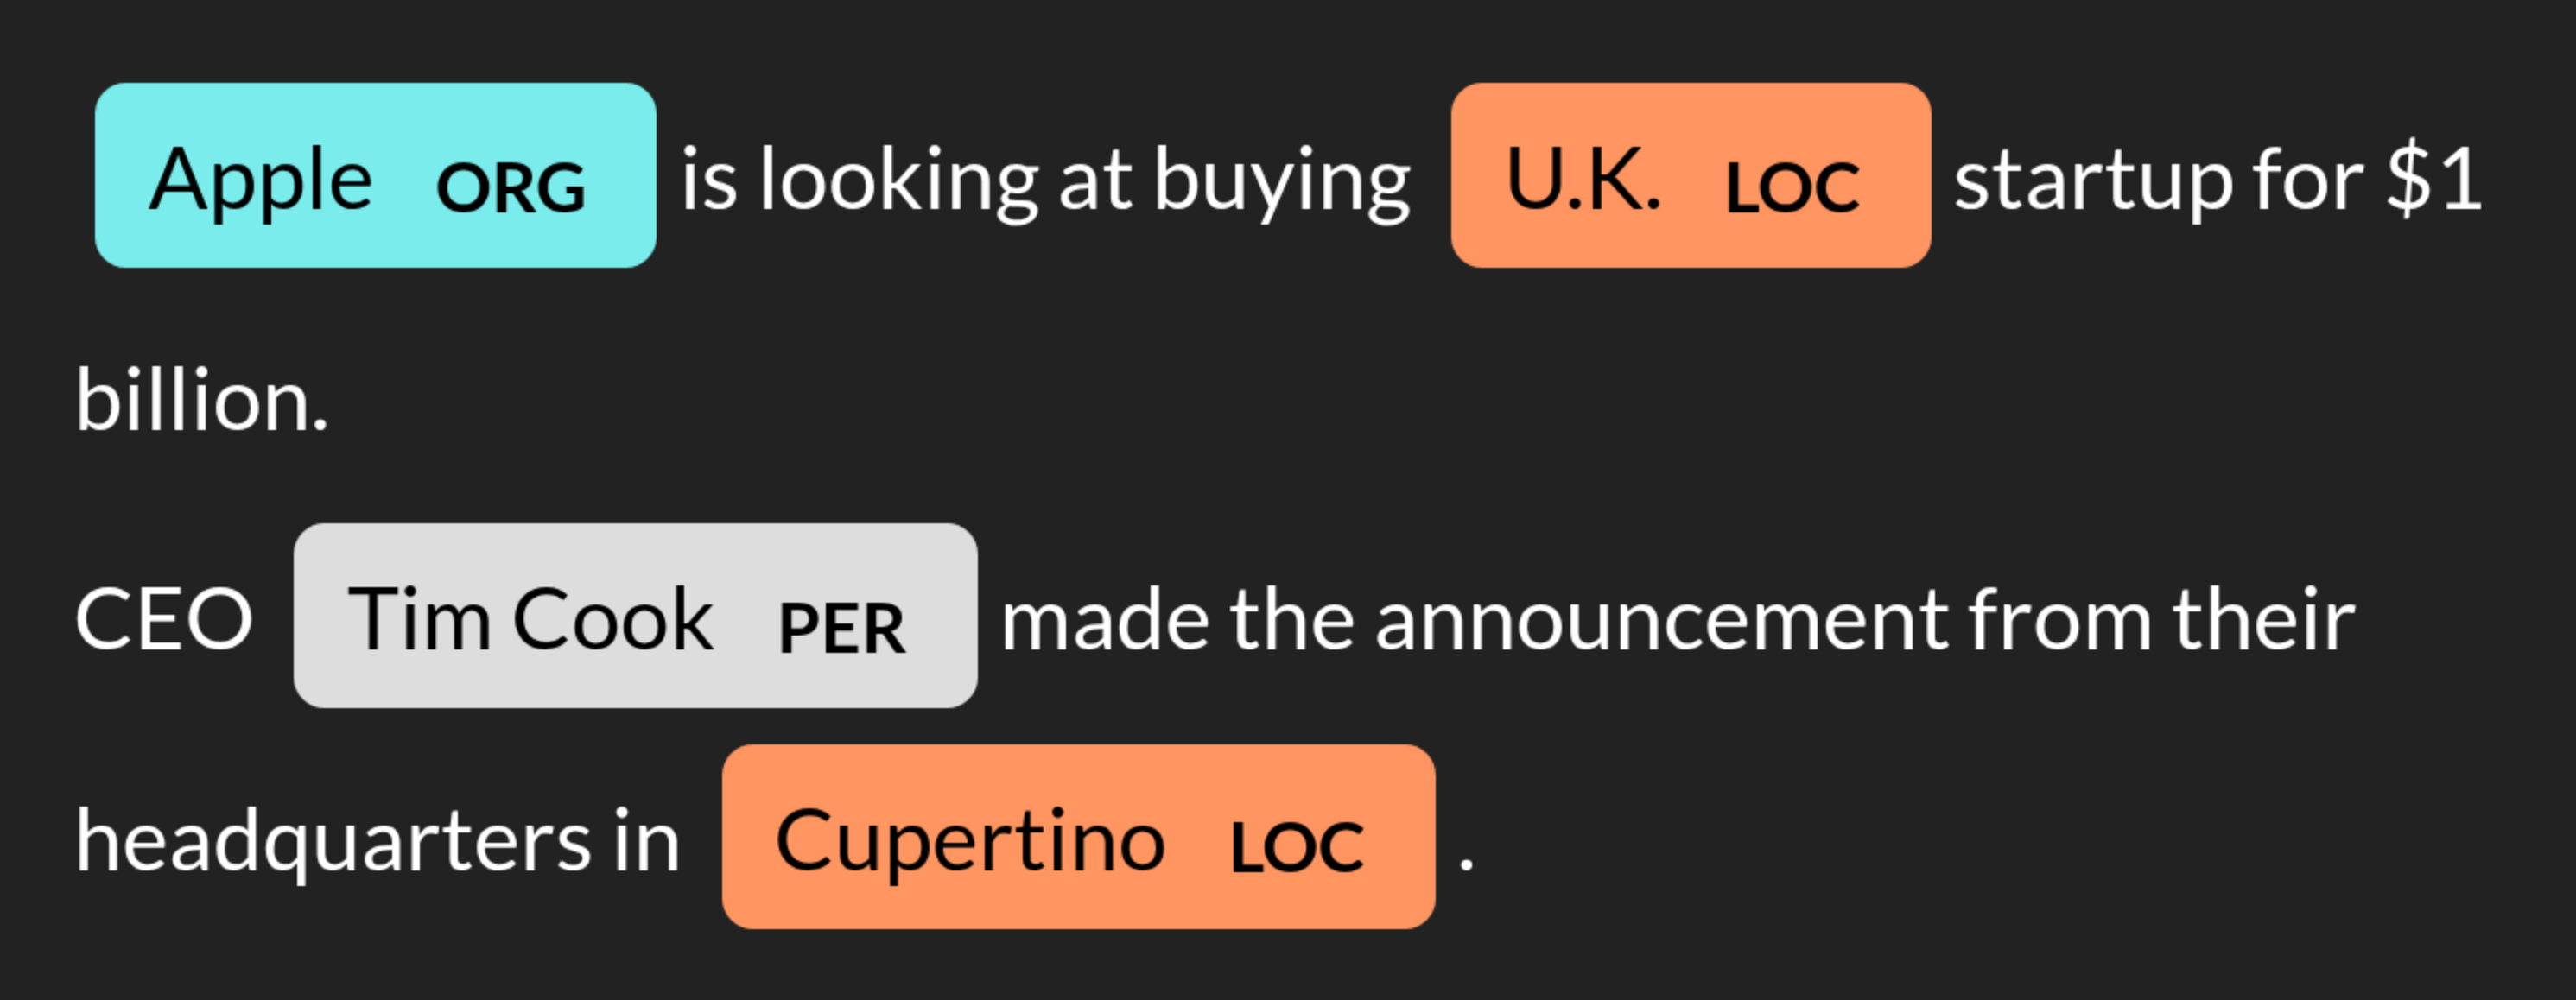
<figcaption aria-hidden="true">Named-entity recognition (NER)
Example</figcaption>
</figure>

Named-entity recognition (NER) is about identifying and classifying
named entities in text into predefined categories such as `persons`,
`organizations`, `locations`, etc. It extracts entities from
unstructured text.

By identifying and categorizing real-world entities in text, NER bridges
the gap between unstructured text and structured information that can
drive decision-making and insights. Here’s why it’s so important:

1.  Business Intelligence & Market Analysis
    -   **Competitive Intelligence**: Extract competitor names,
        products, and initiatives from news articles and reports
    -   **Market Trends**: Identify emerging players, technologies, and
        market shifts by analyzing mentions of organizations and
        products
    -   **Customer Insights**: Extract brand mentions, product names,
        and sentiment indicators from customer feedback
2.  Information Extraction & Knowledge Management
    -   **Automated Data Population**: Populate databases and knowledge
        graphs with structured information extracted from unstructured
        text
    -   **Document Classification**: Enhance document categorization by
        understanding the entities mentioned within content
    -   **Content Recommendation**: Improve content recommendations by
        matching based on entities of interest to users
3.  Search & Retrieval Enhancement
    -   **Semantic Search**: Enable entity-based search beyond simple
        keyword matching
    -   **Question Answering**: Power systems that can answer “who”,
        “where”, and “when” questions by extracting relevant entities
    -   **Document Summarization**: Identify key figures, organizations,
        and locations for inclusion in automated summaries
4.  Healthcare & Biomedical Applications
    -   **Clinical Data Mining**: Extract patient information,
        conditions, treatments, and medications from clinical notes
    -   **Medical Literature Analysis**: Identify relationships between
        diseases, drugs, and genes in research papers
    -   **Clinical Trial Matching**: Match patients to appropriate
        clinical trials based on extracted medical entities
5.  Finance & Risk Management
    -   **Regulatory Compliance**: Extract reporting entities and
        requirements from regulatory documents
    -   **Financial News Analysis**: Track mentions of companies,
        executives, and financial metrics in real-time
    -   **Risk Assessment**: Identify potentially problematic entities
        (people, organizations) for due diligence
6.  Legal Document Analysis
    -   **Contract Analysis**: Extract parties, dates, monetary values,
        and conditions from legal documents
    -   **Case Law Research**: Identify precedents, judges, courts, and
        legal principles in legal opinions
    -   **Compliance Monitoring**: Extract regulated entities and
        requirements from regulatory documents
7.  Security & Intelligence
    -   **Threat Detection**: Identify potentially suspicious
        individuals, organizations, or locations in communications
    -   **Network Analysis**: Build relationship graphs between entities
        mentioned in various documents
    -   **Predictive Analysis**: Use historical patterns of entity
        mentions to predict future events or trends
8.  Benefits Across Applications
    -   **Automation**: Reduce manual data entry and information
        extraction
    -   **Consistency**: Apply uniform entity extraction rules across
        large document collections
    -   **Discovery**: Uncover hidden relationships between entities
        across disparate sources
    -   **Time Efficiency**: Process volumes of text at scale that would
        be impossible manually
    -   **Structured Data Creation**: Transform unstructured text into
        structured, queryable information

## Example

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import spacy
from spacy import displacy

Initialize the NER processor with a transformer model using the
(`dslim/bert-base-NER`).

Alternative model names for NER

-   [`"jean-baptiste/roberta-large-ner-english"`](https://huggingface.co/Jean-Baptiste/roberta-large-ner-english)
-   [`"dbmdz/bert-large-cased-finetuned-conll03-english"`](https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)
-   [`"elastic/distilbert-base-cased-finetuned-conll03-english"`](https://huggingface.co/elastic/distilbert-base-cased-finetuned-conll03-english)

For domain-specific NER, look for models trained on data from your
domain.

For example,
[`"emilyalsentzer/Bio_ClinicalBERT"`](https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT)
for medical text.

In [ ]:
model_name="dslim/bert-base-NER"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
ner_pipeline = pipeline(
    "ner", 
    model=model, 
    tokenizer=tokenizer, 
    aggregation_strategy="simple")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu

Extract named entities from text

In [11]:
text = """Apple is looking at buying U.K. startup for $1 billion. 
CEO Tim Cook made the announcement from their headquarters in Cupertino.
"""
entities_list = ner_pipeline(text)
entities_list

[{'entity_group': 'ORG',
  'score': np.float32(0.9989743),
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity_group': 'LOC',
  'score': np.float32(0.98070335),
  'word': 'U. K.',
  'start': 27,
  'end': 31},
 {'entity_group': 'PER',
  'score': np.float32(0.9997685),
  'word': 'Tim Cook',
  'start': 61,
  'end': 69},
 {'entity_group': 'LOC',
  'score': np.float32(0.9980777),
  'word': 'Cupertino',
  'start': 119,
  'end': 128}]

Visualize entities in text using spaCy’s displacy.

In [ ]:
nlp = spacy.blank("en")
# Create a spaCy Doc
doc = nlp(text)

# Build spaCy Span objects for each entity
spans = [
    doc.char_span(
        start_idx = ent["start"], 
        end_idx = ent["end"], 
        label = ent["entity_group"], 
        alignment_mode = "contract") 
    for ent 
    in entities_list]


# Set the entities in the Doc
doc.ents = filter(lambda x:x != None, spans)


# Display using displacy
displacy.render(doc, style="ent", jupyter=True)

Apple
 ORG 
 
 is looking at buying 
 
 U.K.
 LOC 
 
 startup for $1 billion. CEO 
 
 Tim Cook
 PER 
 
 made the announcement from their headquarters in 
 
 Cupertino
 LOC 
 
.

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***